<a href="https://colab.research.google.com/github/BehrangEbrahimi13/Repo_Paper_01/blob/GAN-experiments/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connections

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/ColabNotebooks/Papers')

Mounted at /content/drive


In [ ]:
import os

directory_path = '/content/drive/MyDrive/ColabNotebooks/Papers'

# List all files and directories in the specified directory
files = os.listdir(directory_path)

# Print the list of files and directories
for file in files:
    print(file)

Paper_01
Repo_Paper_01
Paper_FeatureSelection.ipynb
GANs.ipynb


# Start implementation For x₂ = sin(x₁)

## Importing the necessary libraries

In [ ]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

# Set the random seed for torch
torch.manual_seed(111)

## Preparing the Training Data

In [ ]:
# Define the length of the training data,(1024)
train_data_length = int(math.pow(2, 10))

# Create a tensor of shape (train_data_length, 2) filled with zeros
train_data = torch.zeros((train_data_length, 2))

# Generate random values between 0 and 2*pi and assign them to the first column of train_data
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)

# Compute the sine of the values in the first column and assign them to the second column of train_data
train_data[:, 1] = torch.sin(train_data[:, 0])

# Create a tensor of zeros with length train_data_length to represent the labels
train_labels = torch.zeros(train_data_length)

# Create the training set as a list of tuples, where each tuple contains a data point and its corresponding label
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

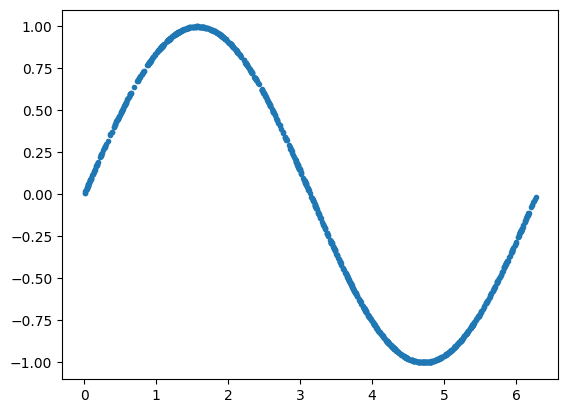

In [ ]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [ ]:
# Set the batch size for training
batch_size = 32

# Create a data loader for the training set
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

## Implementing the Discriminator

In [ ]:
# Define a Discriminator class
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        # Define the model architecture
        self.model = nn.Sequential(
            nn.Linear(2, 256),  # Input layer: 2 input features, 256 output features
            nn.ReLU(),  # ReLU activation function
            nn.Dropout(0.3),  # Dropout layer with a dropout rate of 0.3, adds regularization to the model to avoid overfitting
            nn.Linear(256, 128),  # Hidden layer: 256 input features, 128 output features
            nn.ReLU(),  # ReLU activation function
            nn.Dropout(0.3),  # Dropout layer with a dropout rate of 0.3
            nn.Linear(128, 64),  # Hidden layer: 128 input features, 64 output features
            nn.ReLU(),  # ReLU activation function
            nn.Dropout(0.3),  # Dropout layer with a dropout rate of 0.3
            nn.Linear(64, 1),  # Output layer: 64 input features, 1 output feature
            nn.Sigmoid(),  # Sigmoid activation function to obtain the output in the range [0, 1]
        )

    def forward(self, x):
        # Perform the forward pass through the model
        output = self.model(x)
        return output

# Creates an instance of the Discriminator class and assigns it to the variable discriminator
discriminator = Discriminator()

## Implementing the Generator


In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

## Training the Models

Epoch: 0
  Loss D.: 0.2562105059623718
  Loss G.: 2.6309471130371094 

Epoch: 10
  Loss D.: 0.6909171342849731
  Loss G.: 0.8174402117729187 

Epoch: 20
  Loss D.: 0.5304688215255737
  Loss G.: 0.9098911285400391 

Epoch: 30
  Loss D.: 0.7456434965133667
  Loss G.: 0.6392508745193481 

Epoch: 40
  Loss D.: 0.7063282132148743
  Loss G.: 0.7216967940330505 

Epoch: 50
  Loss D.: 0.6911537647247314
  Loss G.: 0.7593062520027161 

Epoch: 60
  Loss D.: 0.70937180519104
  Loss G.: 0.6376593708992004 

Epoch: 70
  Loss D.: 0.7154445648193359
  Loss G.: 0.6306838989257812 

Epoch: 80
  Loss D.: 1.1214847564697266
  Loss G.: 0.6299290657043457 

Epoch: 90
  Loss D.: 0.6410871744155884
  Loss G.: 0.7430196404457092 

Epoch: 100
  Loss D.: 0.6858258843421936
  Loss G.: 0.6566889882087708 

Epoch: 110
  Loss D.: 0.6528471112251282
  Loss G.: 0.7498162984848022 

Epoch: 120
  Loss D.: 0.5000612735748291
  Loss G.: 1.0352989435195923 

Epoch: 130
  Loss D.: 0.6296682357788086
  Loss G.: 0.7826555967

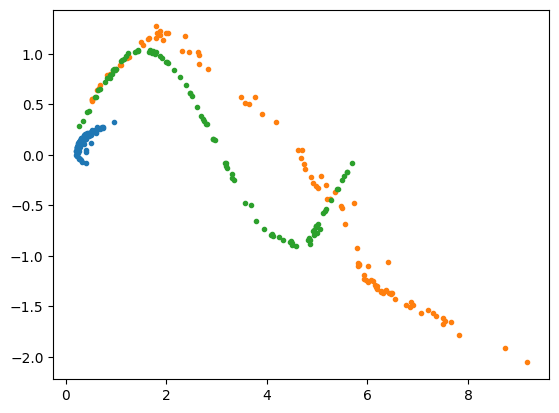

In [ ]:
lr = 0.001 # Learning rate for the optimization algorithm
num_epochs = 300 # Number of training epochs
loss_function = nn.BCELoss() # Binary Cross Entropy Loss function


# Use the Adam algorithm to train the discriminator and generator models
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

# Implement a training loop in which training samples are fed to the models, and their weights are updated to minimize the loss function:

for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

        # Training the discriminator
        # It’s necessary to clear the gradients at each training step to avoid accumulating them
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(output_discriminator, all_samples_labels)
        # Calculate the gradients to update the weights with
        loss_discriminator.backward()
        # Update the discriminator weights by calling
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        # It’s necessary to clear the gradients at each training step to avoid accumulating them
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss.
        # If the condition is met (every 10th epoch and last batch of the epoch), the discriminator and generator losses are printed.
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch}")
            print(f"  Loss D.: {loss_discriminator}")
            print(f"  Loss G.: {loss_generator} \n")

        if epoch % 100 == 0 and n == batch_size - 1:
            latent_space_samples = torch.randn(100, 2)
            g_s = generator(latent_space_samples)
            g_s = g_s.detach()
            plt.plot(g_s[:, 0], g_s[:, 1], ".")

## Checking the Samples Generated by the GAN

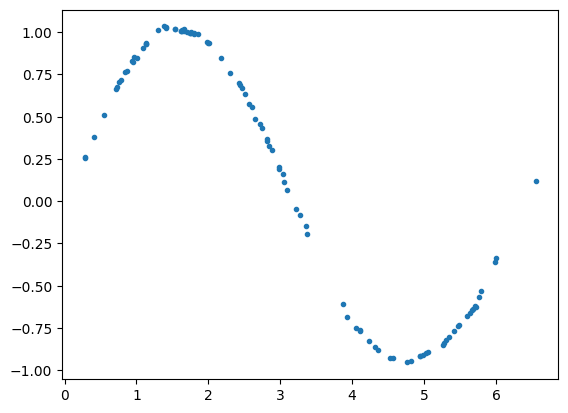

In [ ]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

# To return a tensor from the PyTorch computational graph
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

# Handwritten Digits Generator With a GAN

## Importing the necessary libraries

In [ ]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

torch.manual_seed(111)

## Set Device

In [23]:
device = ""
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

print(device)

cuda


## Preparing the Training Data

The MNIST dataset consists of 28 × 28 pixel grayscale images of handwritten digits from 0 to 9.

It provided defines a transformation pipeline using the transforms.Compose function from the PyTorch library. This pipeline consists of two transformations applied sequentially to an input data sample.

transforms.ToTensor(): This transformation converts the input data, which could be an image or a multi-dimensional array, into a PyTorch tensor. It essentially converts the data into a format that can be processed by PyTorch's tensor-based operations.

transforms.Normalize((0.5,), (0.5,)): This transformation normalizes the input tensor by subtracting a mean value of 0.5 and dividing by a standard deviation of 0.5. Normalization is a common preprocessing step in deep learning that helps to stabilize and improve the convergence of models during training. By normalizing the data in this way, the pixel values of the input tensor will be centered around zero and have a range approximately between -1 and 1.

 It's important to ensure that the normalization parameters match the characteristics of the data you are working with. If your data has a different range or distribution, you may need to adjust the normalization parameters accordingly.

In [ ]:
# transforms.ToTensor() converts the data to a PyTorch tensor.
# transforms.Normalize() converts the range of the tensor coefficients.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [ ]:
# Define the training dataset using the MNIST dataset from torchvision
train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 130321169.95it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 40800166.33it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 35723686.67it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5531512.42it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

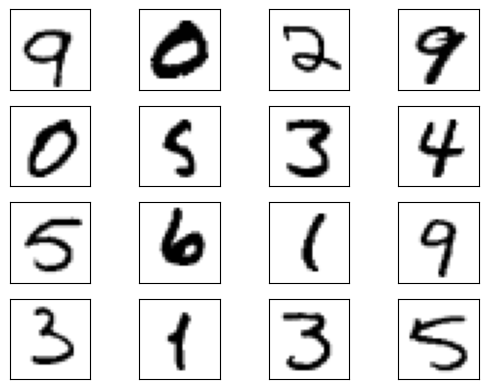

In [22]:
# Obtain a batch of real samples and their corresponding labels from the training loader
real_samples, mnist_lable =  next(iter(train_loader))

# Iterate over the first 16 samples in the batch
for i in range(16):
  ax = plt.subplot(4, 4, i+1)
  plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
  plt.xticks([])
  plt.yticks([])

## Implementing the Discriminator and the Generator

In [25]:
# To input the image coefficients into the MLP neural network,
# we vectorize them so that the neural network receives vectors with 784 coefficients.
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        # Reshape the input tensor to match the desired size for further processing
        # In this case, the original shape of the input x is 32 × 1 × 28 × 28, where 32 is the batch size
        # After the conversion, the shape of x becomes 32 × 784, with each line representing the coefficients of an image of the training set.
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

# Create an instance of the Discriminator model and move it to the specified device
discriminator = Discriminator().to(device=device)

Since the generator is going to generate more complex data, it’s necessary to increase the dimensions of the input from the latent space.

In [29]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            # We use the hyperbolic tangent function Tanh() as the activation of the output layer since the output coefficients should be in the interval from -1 to 1.
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

# instantiate the generator and send it to device to use the GPU if one is available.
generator = Generator().to(device=device)